In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [2]:
# Load dataset
df = pd.read_csv("CC GENERAL.csv")
print("Data shape:", df.shape)

# Drop ID column
if 'CUST_ID' in df.columns:
    df.drop('CUST_ID', axis=1, inplace=True)

Data shape: (8950, 18)


In [ ]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# PCA to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

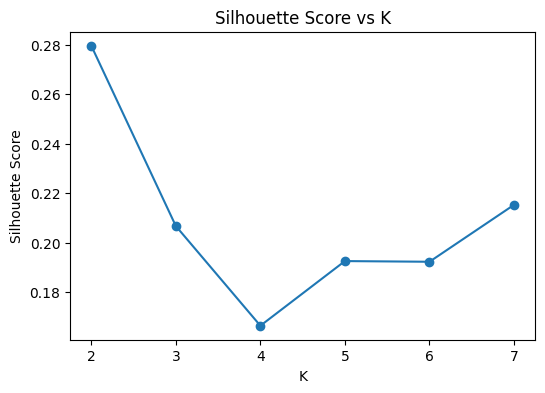

KMeans Silhouette: 0.20671817817880617
KMeans Davies-Bouldin: 1.6593865064655908


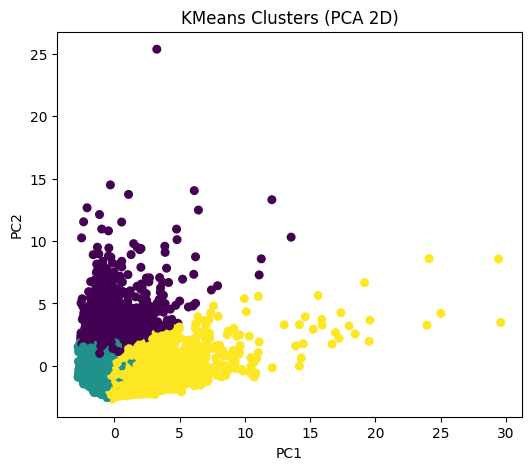

In [ ]:
# KMeans (determine k)
sil_scores = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

# Choose k=3 
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)
print("KMeans Silhouette:", silhouette_score(X_scaled, k_labels))
print("KMeans Davies-Bouldin:", davies_bouldin_score(X_scaled, k_labels))

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=k_labels, cmap='viridis', s=30)
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

Agglomerative Silhouette: 0.1674469835551831
Agglomerative Davies-Bouldin: 1.849565151385222


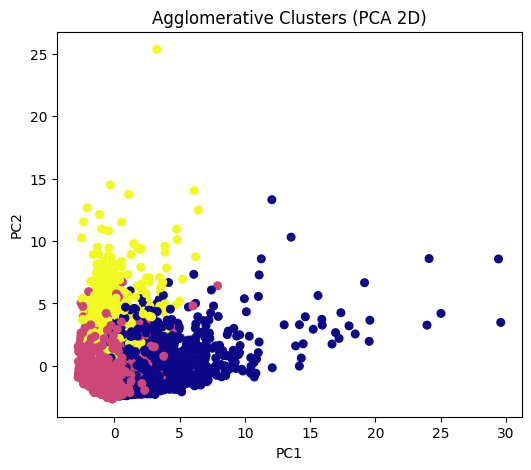

In [7]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)
print("Agglomerative Silhouette:", silhouette_score(X_scaled, agg_labels))
print("Agglomerative Davies-Bouldin:", davies_bouldin_score(X_scaled, agg_labels))

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels, cmap='plasma', s=30)
plt.title("Agglomerative Clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

DBSCAN produced noise or one cluster, silhouette skipped.


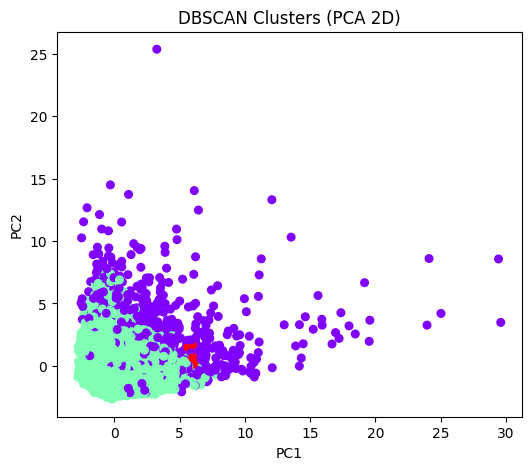

In [8]:
# DBSCAN
db = DBSCAN(eps=2, min_samples=5)
db_labels = db.fit_predict(X_scaled)
if len(set(db_labels)) > 1 and -1 not in set(db_labels):
    print("DBSCAN Silhouette:", silhouette_score(X_scaled, db_labels))
    print("DBSCAN Davies-Bouldin:", davies_bouldin_score(X_scaled, db_labels))
else:
    print("DBSCAN produced noise or one cluster, silhouette skipped.")

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap='rainbow', s=30)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

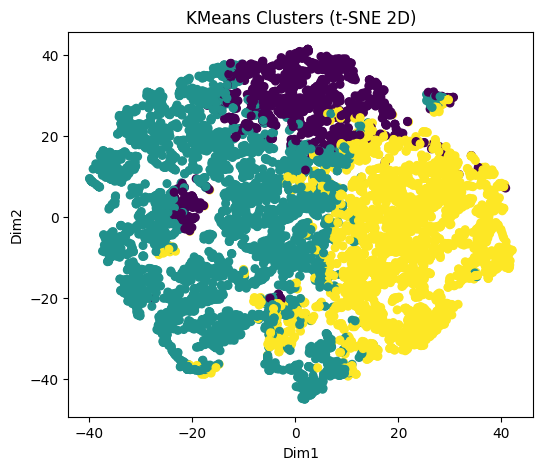

In [10]:
# t-SNE visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=500)  # <- use max_iter
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=k_labels, cmap='viridis', s=30)
plt.title("KMeans Clusters (t-SNE 2D)")
plt.xlabel("Dim1"); plt.ylabel("Dim2")
plt.show()


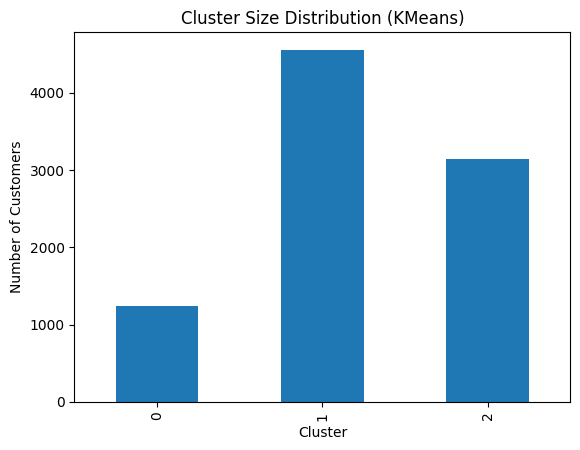

In [11]:
# Cluster size distribution
pd.Series(k_labels).value_counts().sort_index().plot(kind='bar', title="Cluster Size Distribution (KMeans)")
plt.xlabel("Cluster"); plt.ylabel("Number of Customers")
plt.show()

In [12]:
# Cluster profiles
df['Cluster'] = k_labels
profile = df.groupby('Cluster').mean()
print("Cluster profiles (average feature values):")
print(profile.head())

Cluster profiles (average feature values):
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        4540.779565           0.968558   577.328730        362.963055   
1         942.285779           0.789345   302.351964        207.644643   
2        1289.083402           0.968448  2185.667964       1239.933881   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    214.447404   4506.324609             0.285389   
1                     95.005866    529.766557             0.244828   
2                    946.122934    235.275466             0.926621   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.136476                          0.186641   
1               